In [3]:
library(tidyverse)
library(ggplot2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [4]:
sw_analyse = read.csv("/kaggle/input/schwelenwertanalyse/Schwellwertanalyse_Kinddetektion.CSV", sep=";")
sw_analyse

schwellenwert,accuracy,precision,recall,f1_score,false_pos,false_neg,fpr
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
0.00,0.73,0.73,1.00,0.84,43,0,1.00
0.10,0.81,0.79,1.00,0.88,30,0,0.70
0.20,0.85,0.83,1.00,0.91,23,0,0.53
0.30,0.87,0.85,0.99,0.92,20,1,0.47
0.40,0.88,0.87,0.98,0.92,17,2,0.40
0.50,0.91,0.90,0.98,0.94,13,2,0.31
0.60,0.91,0.90,0.98,0.94,12,2,0.29
0.70,0.92,0.92,0.97,0.95,10,3,0.24
0.75,0.91,0.92,0.96,0.94,10,5,0.24


Warning message:
“Removed 1 row(s) containing missing values (geom_path).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 1 row(s) containing missing values (geom_path).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 1 row(s) containing missing values (geom_path).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 1 row(s) containing missing values (geom_path).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”
Saving 9 x 6.67 in image

Warning message:
“Removed 1 row(s) containing missing values (geom_path).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 1 row(s) containing missing values (geom_path).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 1 row(s) containing missing values (geom_path).”
Warni

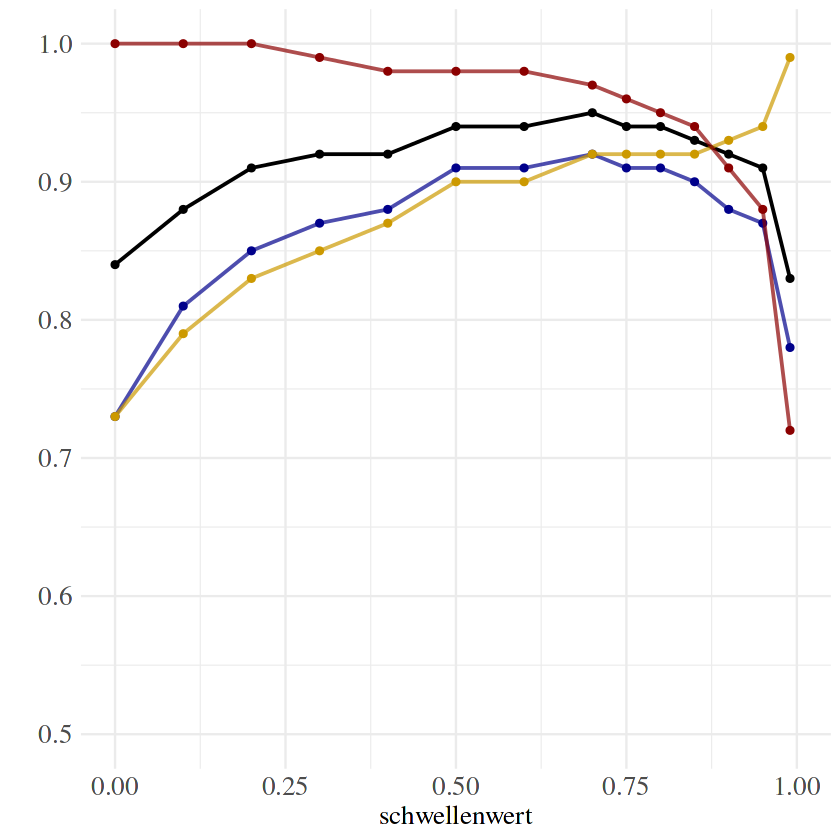

In [5]:
sw_analyse %>% 
    ggplot(aes(x=schwellenwert)) +
    geom_line(aes(y=f1_score), color="black" , size=0.8) + geom_point(aes(y=f1_score))+
    geom_line(aes(y=accuracy), color="darkblue", size=0.8, alpha=0.7)+ geom_point(aes(y=accuracy),color="darkblue") +
    geom_line(aes(y=precision),color="#CC9900",  size=0.8, alpha=0.7)+ geom_point(aes(y=precision),color="#CC9900")+
    geom_line(aes(y=recall),color ="darkred", size=0.8,alpha=0.7)+ geom_point(aes(y=recall),color="darkred") + 
    #geom_line(aes(y=fpr),color ="darkgreen", size=0.6,alpha=0.4, linetype="twodash")+
    theme_minimal() +
    scale_x_continuous(limits=c(0.00,0.9999)) +
    scale_y_continuous(limits=c(0.5,1)) +
    theme(text = element_text(family = "Times New Roman"), 
      axis.title = element_text(size = 16),
      axis.text = element_text(size = 16)
      )  + labs(y="", x="schwellenwert") -> schwellenwerte

schwellenwerte
ggsave("schwellenwertanalyse.jpg", width=9)

In [6]:
roc <- 
sw_analyse %>% 
    integrate(recall,0,10)

ERROR: Error in get(as.character(FUN), mode = "function", envir = envir): object '.' of mode 'function' was not found


Saving 5 x 6.67 in image



ERROR: Error in f(...): unused argument (higth = 5)


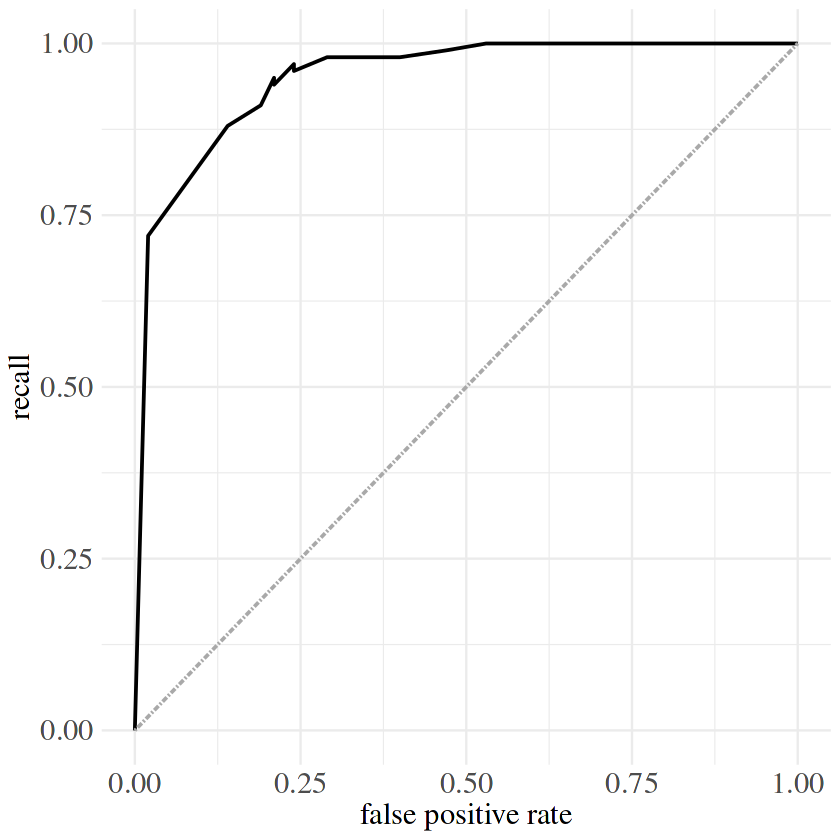

In [7]:
# AUC-Kurve Zeichen 
sw_analyse %>% 
    ggplot(aes(x=fpr)) +
    geom_line(aes(y=recall),size=0.8)+ 
    geom_line(aes(y=fpr), color="darkgrey",linetype="twodash",size=0.8) +
    theme_minimal()+
    theme(text = element_text(family = "Times New Roman"), 
      axis.title = element_text(size = 18),
      axis.text = element_text(size = 18)
      )  + labs(y="recall", x="false positive rate") -> roc

roc
ggsave("roc.jpg", width=5, higth=5)

In [9]:
swPerformance %>% 
    ggplot(aes(x=Step)) + 
    geom_line(aes(y=SSD_map), color="darkgreen" , size=0.8) +
    geom_line(aes(y=EffDet.D0_map),color="darkred", size=0.8 ) +
    geom_line(aes(y=EffDet.D1_map), color="#CC9900", size=0.8) +
    geom_line(aes(y=FasterRCNN_map), color="darkblue", size=0.8) + scale_y_continuous(limits=c(0.00,0.7)) + theme_minimal()+
    theme(text = element_text(family = "Times New Roman"), 
      axis.title = element_text(size = 18),
       axis.text = element_text(size = 18)
      )  + labs(y="mAP", x="steps") -> schwellenwerte
schwellenwerte
ggsave("schwellenwertanalyse.jpg", width=10)

ERROR: Error in ggplot(., aes(x = Step)): object 'swPerformance' not found


In [10]:
modell_vgl = read.csv("/kaggle/input/modellvergleich-val/validation_metriken_vergleich.CSV", sep=";")
modell_vgl%>%
    summary()

      Step          SSD_map            ssd_map50         SSD_map75iou      
 Min.   :    0   Min.   :0.0002376   Min.   :0.001485   Min.   :0.0000096  
 1st Qu.: 5000   1st Qu.:0.4353549   1st Qu.:0.794927   1st Qu.:0.4539773  
 Median :10000   Median :0.4820100   Median :0.804075   Median :0.5254516  
 Mean   :10000   Mean   :0.4374718   Mean   :0.747617   Mean   :0.4693107  
 3rd Qu.:15000   3rd Qu.:0.5060700   3rd Qu.:0.825066   3rd Qu.:0.5654405  
 Max.   :20000   Max.   :0.5371206   Max.   :0.865160   Max.   :0.6065611  
    SSD_ar10        SSD_ar100       EffDet.D0_map       efficientdetD0_map50
 Min.   :0.0000   Min.   :0.08099   Min.   :0.0001861   Min.   :0.001199    
 1st Qu.:0.5719   1st Qu.:0.59917   1st Qu.:0.5600035   1st Qu.:0.863016    
 Median :0.5959   Median :0.62562   Median :0.5813429   Median :0.874452    
 Mean   :0.5521   Mean   :0.59142   Mean   :0.5261846   Mean   :0.806068    
 3rd Qu.:0.6083   3rd Qu.:0.64132   3rd Qu.:0.5895360   3rd Qu.:0.886362    
 Max. 

Saving 10 x 6.67 in image



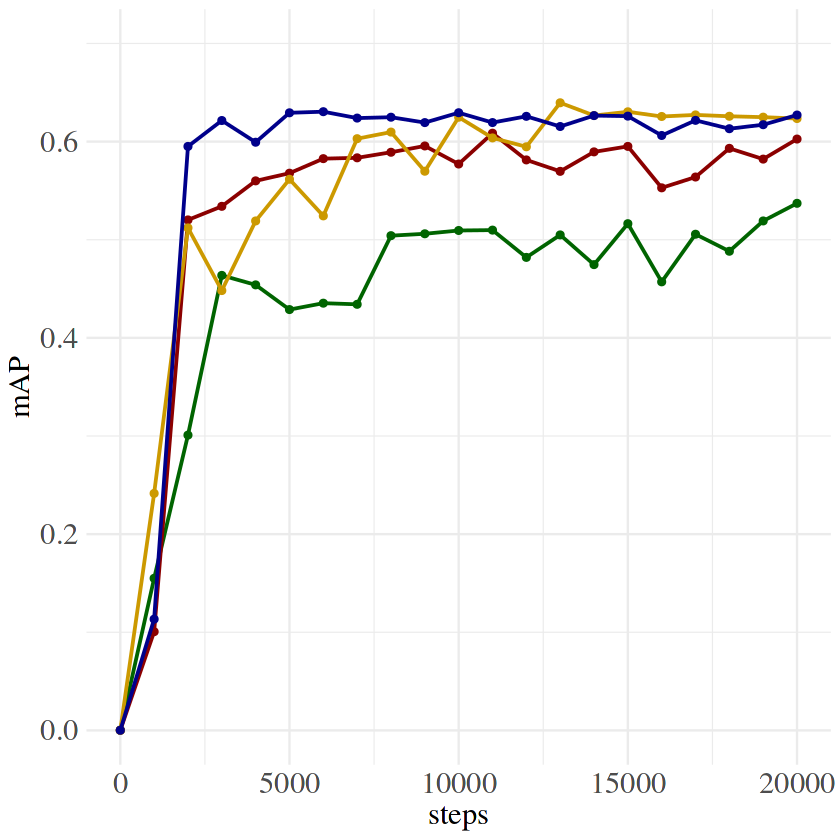

In [11]:
modell_vgl %>%
    ggplot(aes(x=Step)) + 
    geom_line(aes(y=SSD_map), color="darkgreen" , size=0.8) + geom_point(aes(y=SSD_map),color="darkgreen") +
    geom_line(aes(y=EffDet.D0_map),color="darkred", size=0.8 ) +  geom_point(aes(y=EffDet.D0_map), color="darkred") + 
    geom_line(aes(y=EffDet.D1_map), color="#CC9900", size=0.8) + geom_point(aes(y=EffDet.D1_map),color="#CC9900")+
    geom_line(aes(y=FasterRCNN_map), color="darkblue", size=0.8)+ geom_point(aes(y=FasterRCNN_map),color="darkblue")+ 
    scale_y_continuous(limits=c(0.00,0.7)) + theme_minimal()+
    theme(text = element_text(family = "Times New Roman"), 
      axis.title = element_text(size = 18),
       axis.text = element_text(size = 18)
      )  + labs(y="mAP", x="steps") -> plt
plt
ggsave("mapVergleich.jpg", width=10)

In [12]:
vgl_zfg = read.csv("/kaggle/input/zfg-modellvgl-entscheidung/4_Modell_Vergleich.csv")
vgl_zfg %>% 
    head()

Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“incomplete final line found by readTableHeader on '/kaggle/input/zfg-modellvgl-entscheidung/4_Modell_Vergleich.csv'”


,modell,inferenzzeit,map
,<chr>,<int>,<dbl>
1,ssd_mobilenet_v2,28,53.71
2,efficientdet_D0,48,60.85
3,efficientdet_D1,71,63.03
4,fasterRcnn_v2,117,63.04


Saving 10 x 6.67 in image



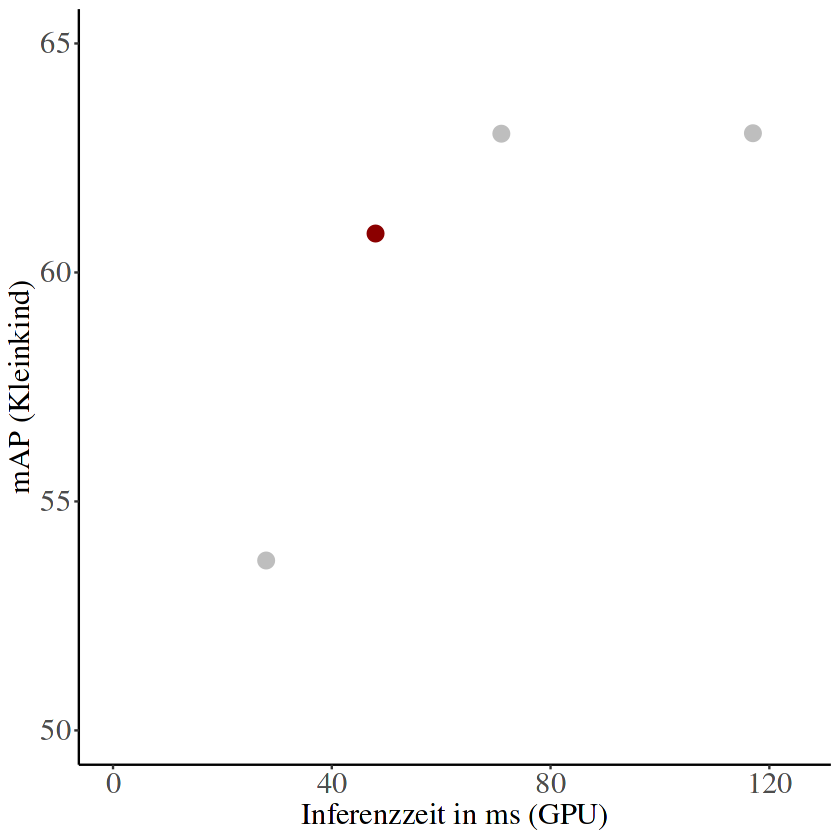

In [13]:
# Maximale mAP (über alle Steps) ist schon in 4 zeiliger CSV-Datei hinterlegt.
vgl_zfg %>%  
    ggplot(aes(x=inferenzzeit, y=map)) +
    geom_point(data =vgl_zfg %>% 
                   filter(modell %in% c("efficientdet_D0")),
                     color = "darkred", size = 4, alpha=3) +
    geom_point(data = vgl_zfg %>%
                     filter(!modell %in% c("efficientdet_D0")), 
                     color = "grey",size  = 4, alpha =1)+
  
    labs(x = "Inferenzzeit in ms (GPU)",
       y = "mAP (Kleinkind)")+
  scale_x_continuous(limits = c(0, 125, 25))+
  scale_y_continuous(limits = c(50, 65, 5)) + 
  theme_classic() +
    theme(text = element_text(family = "Times New Roman"),
        title = element_text(size = 16),
        plot.subtitle = element_text(size = 18),
        plot.caption = element_text(size = 18),
        axis.title = element_text(size = 18),
        axis.text = element_text(size = 18), 
        panel.grid.minor.x = element_blank()) ->plt
plt
ggsave("modellentscheidung.jpg", width=10)

In [14]:
evaluation_vgl = read.csv("/kaggle/input/evaluation-vergleich/Evaluation_Vergleich_Graphen_TBoard.csv", sep=";")
# evaluation_vgl%>%
#     head()

einstufige_loss_vgl = read.csv("/kaggle/input/einstufige-models-loss-vgl/einstufige_model_loss_vgl.csv", sep=";")
einstufige_loss_vgl %>% 
    head()

,steps,effdetD0,efficientdet.D1,Ssd.Mobile.Net,SSD.MobileNet,efficientdet.D1.angepasst,mobileNet_ange,Faster.RCNN,val_effdetD0,val_effdetD1,val_ssd_mobilenet
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,100,1.1724142,1.1158766,0.8277464,0.6876602,0.8369074,0.9519083,0.04881891,1.3836,1.936004,4.211082
3,200,0.7252288,0.6008372,0.7750421,0.6464565,0.4506279,0.8912984,0.08914086,NA,NA,NA
4,300,0.7393338,0.5724418,0.5481085,0.9920001,0.4293313,0.6303248,0.07905410,NA,NA,NA
5,400,0.5880296,0.5498375,0.4952442,0.6113316,0.4123781,0.5695309,0.04510130,NA,NA,NA
6,500,0.6188329,0.4944687,0.5084941,0.6194310,0.3708515,0.5847683,0.09792168,NA,NA,NA


Warning message:
“Removed 1 row(s) containing missing values (geom_path).”
Warning message:
“Removed 1 row(s) containing missing values (geom_path).”
Warning message:
“Removed 1 row(s) containing missing values (geom_path).”
Warning message:
“Removed 1 row(s) containing missing values (geom_path).”
Warning message:
“Removed 1 row(s) containing missing values (geom_path).”
Saving 10 x 6.67 in image

Warning message:
“Removed 1 row(s) containing missing values (geom_path).”
Warning message:
“Removed 1 row(s) containing missing values (geom_path).”
Warning message:
“Removed 1 row(s) containing missing values (geom_path).”
Warning message:
“Removed 1 row(s) containing missing values (geom_path).”
Warning message:
“Removed 1 row(s) containing missing values (geom_path).”


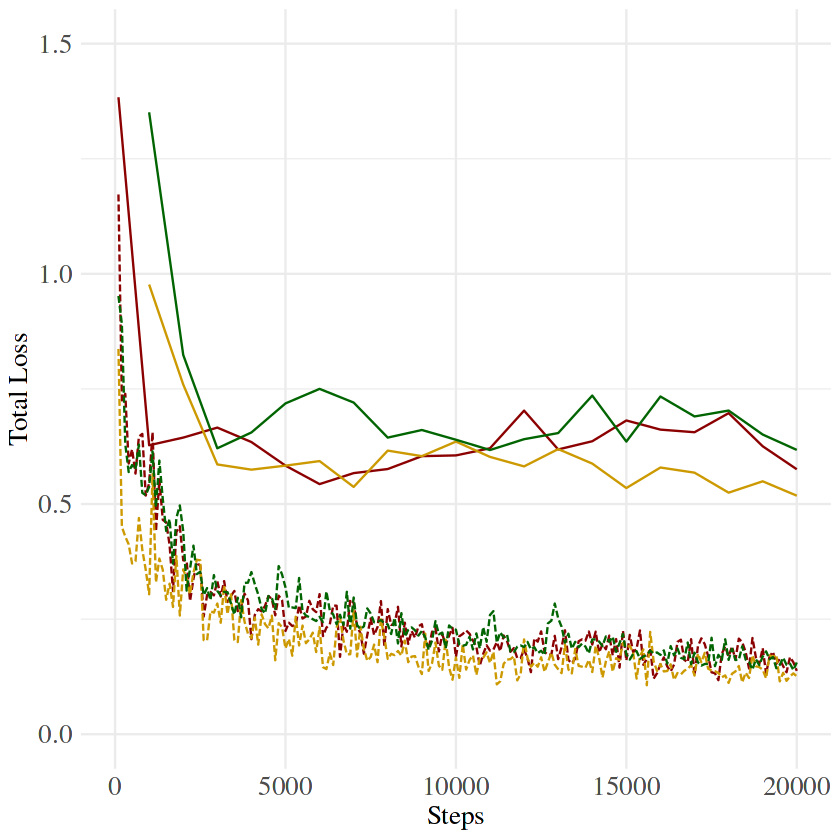

In [15]:
einstufige_loss_vgl %>% 
    ggplot(aes(x=steps)) +
    geom_line(aes(y =effdetD0), color = "darkred", linetype="longdash") + 
    geom_line(aes(y = val_effdetD0), color = "darkred",na.omit(einstufige_loss_vgl)) +
    geom_line(aes(y = efficientdet.D1.angepasst), color="#CC9900", linetype="longdash") + 
    geom_line(aes(y = val_effdetD1), color = "#CC9900", na.omit(einstufige_loss_vgl))+
    geom_line(aes(y = mobileNet_ange), color="darkgreen", linetype="longdash") + 
    geom_line(aes(y = val_ssd_mobilenet), color = "darkgreen", na.omit(einstufige_loss_vgl))+
    labs(x="Steps", y="Total Loss") +scale_y_continuous(limits=c(0,1.5)) + theme_minimal() +
    theme(text = element_text(family = "Times New Roman"),
        title = element_text(size = 16),
        plot.subtitle = element_text(size = 14),
        plot.caption = element_text(size = 8),
        axis.title = element_text(size = 16),
        axis.text = element_text(size = 16),
        panel.grid.minor.x = element_blank()) -> plt

plt 
ggsave("einstufiger_loss_vergleich.png", width=10)

In [16]:
rechenzeitCSV_no_gpu =read.csv("../input/rechenzeitencsv-no-gpu/Rechenzeiten_Val_1024px_NO_GPU.csv", sep=";")

In [17]:
rechenzeitCSV <- read.csv("../input/rechenzeitcsv/Rechenzeiten_Val_1024px_GPU.csv", sep=";")
rechenzeitCSV %>% head()

,Zeiten.gesamt,Vorbereitungsszeit,Inferenzzeit,Verarbeitungszeit,Groesse,Name,Modell
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>
1,0.59343,0.53040,0.02695,0.03476,109303,image1,SSD MobileNet v2
2,0.62397,0.56444,0.02629,0.03191,99258,image2,SSD MobileNet v2
3,0.53511,0.47740,0.02785,0.02872,53860,image3,SSD MobileNet v2
4,0.60779,0.54642,0.02778,0.03297,80367,image4,SSD MobileNet v2
5,0.58369,0.51997,0.02507,0.03650,113572,image5,SSD MobileNet v2
6,0.58047,0.51827,0.02734,0.03204,84649,image6,SSD MobileNet v2


In [18]:
rechenzeitCSV %>% 
 group_by(Modell) %>% 
 summarise(across(-Groesse,mean, na.rm = FALSE))

Warning message in mean.default(col, ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(col, ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(col, ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(col, ...):
“argument is not numeric or logical: returning NA”


Modell,Zeiten.gesamt,Vorbereitungsszeit,Inferenzzeit,Verarbeitungszeit,Name
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
EfficientDet D0,0.5570819,0.4766304,0.04789359,0.03092184,NA
EfficientDet D1,0.5713873,0.4656441,0.07121699,0.03296427,NA
Faster-R-CNN ResNet101 V1,0.6153158,0.4637867,0.11658874,0.03342058,NA
SSD MobileNet v2,0.5364100,0.4737551,0.02789612,0.03327194,NA


In [19]:
rechenzeitCSV_no_gpu %>% 
 group_by(Modell) %>% 
 summarise(across(-Groesse,mean, na.rm = FALSE))

Warning message in mean.default(col, ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(col, ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(col, ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(col, ...):
“argument is not numeric or logical: returning NA”


Modell,Zeiten.gesamt,Vorbereitungsszeit,Inferenzzeit,Verarbeitungszeit,Name
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
EfficientDet D0,1.190887,0.6470947,0.4986425,0.04215988,NA
EfficientDet D1,1.870378,0.6505112,1.1742790,0.04281777,NA
Faster-R-CNN ResNet101 V1,7.987367,0.6678091,7.0796419,0.04518246,NA
SSD MobileNet v2,0.868325,0.6917392,0.1301688,0.04342557,NA


In [20]:
get_box_stats2 <- function(y) {
  return(data.frame(y=7, label = paste(
      " Mean =", round(mean(y), 3), "\n", 
      "Median =", round(median(y), 3), "\n"
    )
  ))
}

ERROR: Error in eval(expr, envir, enclos): object 'rechenzeitPlot' not found


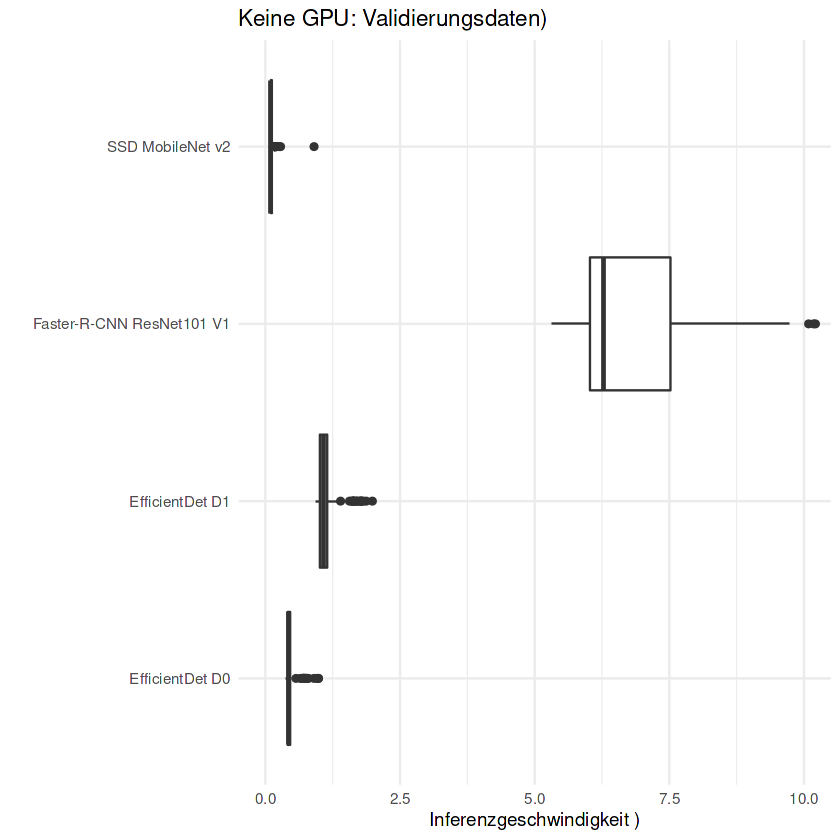

In [21]:
rechenzeitCSV_no_gpu %>%
ggplot(aes(x=Inferenzzeit, y=Modell)) +  geom_boxplot() +
labs( title = "Keine GPU: Validierungsdaten)", y = "", x = "Inferenzgeschwindigkeit )" )+ 
#stat_summary(fun.data = get_box_stats2, geom = "text", hjust = 0, vjust = +1.9, color="darkred")+
#stat_summary(fun=mean, colour="darkred", geom="point", shape=18, size=3,show.legend = FALSE) +
theme(text = element_text(family = "Times New Roman"),
      title = element_text(size = 16), 
      axis.title = element_text(size = 18),
      axis.text = element_text(size = 18)
     ) + 

coord_cartesian(xlim = c(0,10))+ theme_minimal()

rechenzeitPlot

In [22]:
get_box_stats <- function(y) {
  return(data.frame(y=0.01, label = paste(
      " Mean =", round(mean(y), 3), "\n", 
      "Median =", round(median(y), 3), "\n"
    )
  ))
}

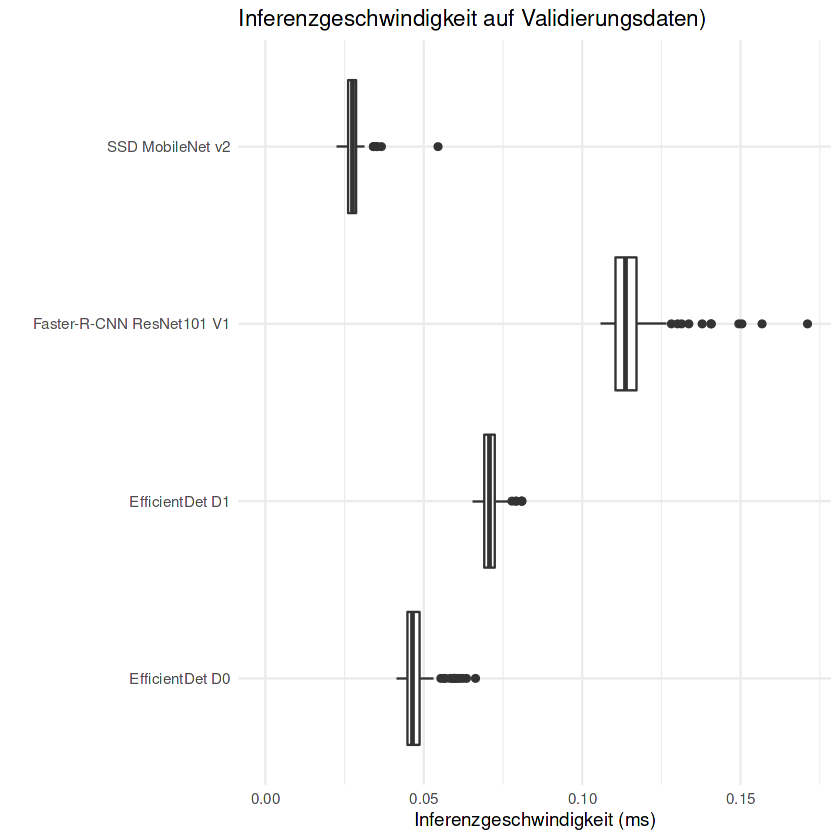

In [23]:
rechenzeitCSV %>%
ggplot(aes(x=Inferenzzeit, y=Modell)) +  geom_boxplot() +
labs( title = "Inferenzgeschwindigkeit auf Validierungsdaten)", y = "", x = "Inferenzgeschwindigkeit (ms)" )+ 
#stat_summary(fun.data = get_box_stats, geom = "text", hjust = 0, vjust = +1.9, color="darkred")+
#stat_summary(fun=mean, colour="darkred", geom="point", shape=18, size=3,show.legend = FALSE) +
theme(text = element_text(family = "Times New Roman"),
      title = element_text(size = 16), 
      axis.title = element_text(size = 18),
      axis.text = element_text(size = 18)
     ) +
coord_cartesian(xlim = c(0,0.17))+ theme_minimal() -> rechenzeitPlot
rechenzeitPlot

In [24]:
modellZoo <- read.csv("/kaggle/input/models/Eigenschaften_Model_Zoo_Vorauswahl.csv", sep=";")
modellZoo

modelname,speed,map
<chr>,<int>,<dbl>
CenterNet HourGlass104 512x512,70,41.9
CenterNet HourGlass104 Keypoints 512x512,76,40.0
CenterNet HourGlass104 1024x1024,197,44.5
CenterNet HourGlass104 Keypoints 1024x1024,211,42.8
CenterNet Resnet50 V1 FPN 512x512,27,31.2
CenterNet Resnet50 V1 FPN Keypoints 512x512,30,29.3
CenterNet Resnet101 V1 FPN 512x512,34,34.2
CenterNet Resnet50 V2 512x512,27,29.5
CenterNet Resnet50 V2 Keypoints 512x512,30,27.6


In [33]:
modelZoo %>% 
    mutate("ratio" = (map/speed)) -> modelZoo
modelZoo

ERROR: Error in mutate(., ratio = (map/speed)): object 'modelZoo' not found


Saving 10 x 6.67 in image



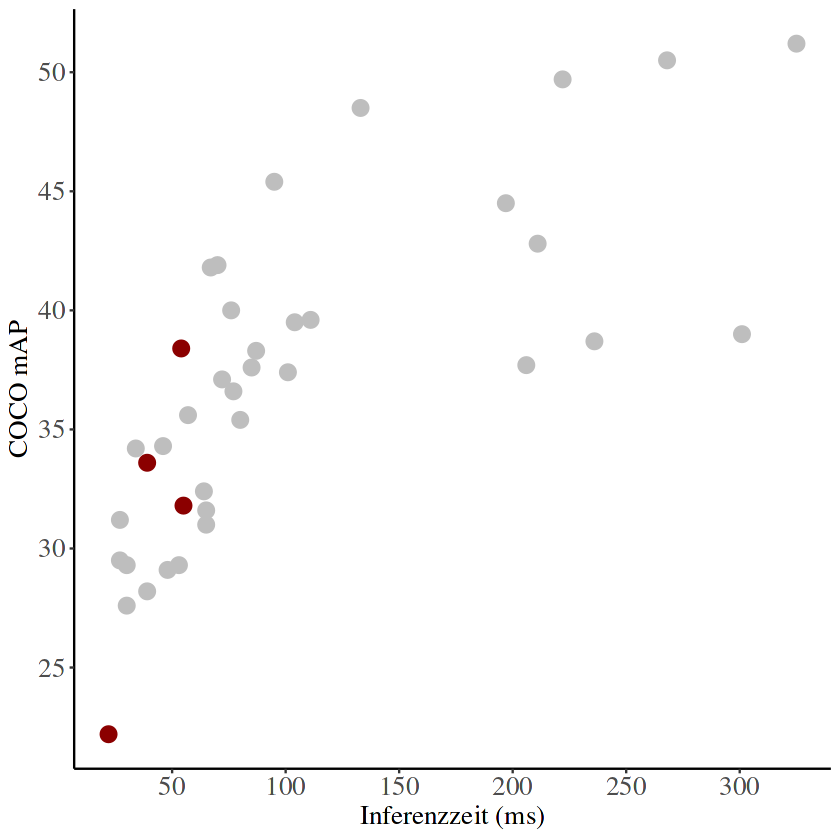

In [37]:
library(ggplot2)
pacman::p_load(tidyverse, polite, scales, ggimage, ggforce,
               rvest, glue, extrafont, ggrepel, magick)

modellZoo %>% 
    ggplot(aes(x=speed, y=map )) +
    geom_point(data = modellZoo %>%
                     filter(modelname %in% c("EfficientDet D1 640x640", "EfficientDet D0 512x512", "SSD MobileNet V2 FPNLite 320x320","Faster R-CNN ResNet101 V1 640x640" )),
                     color = "darkred", size = 4, alpha=3) +
    geom_point(data = modellZoo %>%
                     filter(!modelname %in% c("EfficientDet D1 640x640","EfficientDet D0 512x512", "SSD MobileNet V2 FPNLite 320x320",  "Faster R-CNN ResNet101 V1 640x640")), 
                     color = "grey",size  = 4, alpha =1)+ 
#     geom_text_repel(data = modellZoo %>%
#                     filter(modelname %in% c("EfficientDet D1 640x640", "SSD MobileNet V2 FPNLite 320x320","Faster R-CNN ResNet101 V1 640x640")),
#                     aes(label = modelname, family = "Times New Roman", fontface = "bold"), 
#                     seed =1, size = 4, 
#                     min.segment.length = 9, segment.color = "red") + 

    labs(x = "Inferenzzeit (ms)",
       y = "COCO mAP")+
     scale_x_continuous(breaks=seq(0,300,50)) +
    scale_y_continuous(breaks=seq(0,55,5))+
    theme_classic()+
  theme(text = element_text(family = "Times New Roman"),
        title = element_text(size = 16),
        plot.subtitle = element_text(size = 14),
        plot.caption = element_text(size = 8),
        axis.title = element_text(size = 16),
        axis.text = element_text(size = 16),
        panel.grid.minor.x = element_blank() )  -> plt

plt
ggsave("model_zoo_vergleich.png", width=10)